# Testing bootstrapped ensemble test-set filter on preproject feature-set

In [1]:
import numpy as np
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import utility

sys.path.insert(1, module_path + '/src/models')
import bootstrapped_ensemble_cluster_filter as BE_cluster_filter
import helper


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from time import time
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array

import pprint
import pickle
from time import time

figure_path = module_path + '/figures/'

# Load data, and select features

In [4]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/heartsound_MiniROCKET_TRAIN.ts')

X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/heartsound_MiniROCKET_TEST.ts')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

X_train = from_nested_to_2d_array(X_train)
X_test = from_nested_to_2d_array(X_test)

y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

X_train.columns = np.arange(len(X_train.columns))
X_test.columns = np.arange(len(X_test.columns))

X_train.head(10)


y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

0.6118421052631579

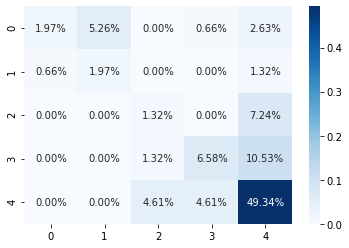

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
import seaborn as sns
clf = KNeighborsClassifier(n_neighbors=4, weights='distance').fit(X_train, y_train)

pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#plot_confusion_matrix(clf, X_test, y_test)
accuracy_score(y_test, clf.predict(X_test))

In [2]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/binaryheart_preproject_TRAIN.ts')

X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/binaryheart_preproject_TEST.ts')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

X_train = from_nested_to_2d_array(X_train)
X_test = from_nested_to_2d_array(X_test)

y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

X_train.columns = np.arange(len(X_train.columns))
X_test.columns = np.arange(len(X_test.columns))

X_train.head(10)


y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

0.8536585365853658

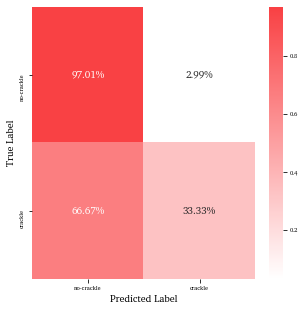

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
import seaborn as sns
clf = KNeighborsClassifier(n_neighbors=4, weights='distance').fit(X_train, y_train)

pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
utility.plot_cm(y_test, pred, module_path = module_path)

#plot_confusion_matrix(clf, X_test, y_test)
accuracy_score(y_test, clf.predict(X_test))

(<Figure size 360x360 with 2 Axes>,
 <AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>)

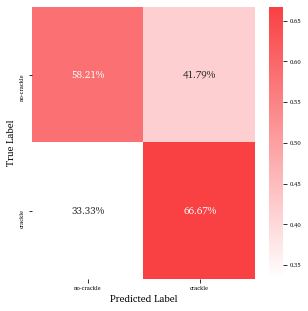

In [27]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, pred)
utility.plot_cm(y_test, pred, module_path = module_path)